In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 73.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/499A_Project/RTE/rte_train_400.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

df2 = pd.read_csv('/content/drive/MyDrive/499A_Project/RTE/rte_test_100.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(df1.head())

                                                text  \
0  A place of sorrow, after Pope John Paul II die...   
1  Herceptin was already approved to treat the si...   
2  Judie Vivian, chief executive at ProMedica, a ...   
3  Britain said, Friday, that it has barred cleri...   
4  WASHINGTON --  A newly declassified narrative ...   

                                              text.1  label  
0  Pope Benedict XVI is the new leader of the Rom...      1  
1      Herceptin can be used to treat breast cancer.      1  
2  The previous name of Ho Chi Minh City was Saigon.      1  
3      Bakri was briefly detained, but was released.      1  
4        Dick Cheney was the Vice President of Bush.      1  


In [7]:
print(df2.head())

                                                text  \
0  The answer to the number one question, "how ma...   
1  A teenager, belonging to the anti-scientology ...   
2  It is an independence movement among the Tamil...   
3  The Sea-Viewing wide Field-of-View Sensor, Sea...   
4  The American Defense Department reported today...   

                                              text.1  label  
0                        There are seven continents.      1  
1  The 18 year-old D. Guzner is a member of the A...      1  
2           The current name of Ceylon is Sri Lanka.      1  
3                 Ocean remote sensing is developed.      1  
4  The Pentagon reported today, that the bombing ...      1  


In [8]:
df1.label[df1.label == 1]="TRUE"
df1.label[df1.label == 0]="FALSE"

df2.label[df2.label == 1]="TRUE"
df2.label[df2.label == 0]="FALSE"

<ipython-input-8-af82ade73374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[df1.label == 1]="TRUE"
<ipython-input-8-af82ade73374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 1]="TRUE"


In [9]:
# taking acceptable and deleting unacceptable
df3 = df1[~df1.label.str.contains('TRUE')]
df3 = df3.sample(n=200, replace=True)
df3["label"].value_counts()

FALSE    200
Name: label, dtype: int64

In [10]:
# taking acceptable and deleting unacceptable
df4 = df1[~df1.label.str.contains('FALSE')]
df4 = df4.sample(n=200, replace=True)
df4["label"].value_counts()

TRUE    200
Name: label, dtype: int64

In [11]:
frames = [df3, df4]

temp = pd.concat(frames)

In [12]:
temp["label"].value_counts()

FALSE    200
TRUE     200
Name: label, dtype: int64

In [13]:
# taking acceptable and deleting unacceptable
df5 = df2[~df2.label.str.contains('TRUE')]
df5 = df5.sample(n=50, replace=True)
df5["label"].value_counts()

FALSE    50
Name: label, dtype: int64

In [14]:
# taking acceptable and deleting unacceptable
df6 = df2[~df2.label.str.contains('FALSE')]
df6 = df6.sample(n=50, replace=True)
df6["label"].value_counts()

TRUE    50
Name: label, dtype: int64

In [15]:
frames2 = [df5, df6]

temp2 = pd.concat(frames2)

In [16]:
temp2["label"].value_counts()

FALSE    50
TRUE     50
Name: label, dtype: int64

In [17]:
frames3 = [df3, df4, df5, df6]

temp3 = pd.concat(frames3)

In [18]:
temp3["label"].value_counts()

FALSE    250
TRUE     250
Name: label, dtype: int64

In [19]:
text1 = temp3['text']+temp3['text']
emotion= temp3['label'].tolist()
text=text1.values.tolist()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [21]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

400
400
100
100


In [22]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [24]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 81
	95percentile : 211
	99percentile : 293


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 79
	95percentile : 205
	99percentile : 267


In [25]:
model = t.get_classifier()

In [26]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 69s 686ms/step - loss: 15.8222 - accuracy: 0.5103


done.
Visually inspect loss plot and select learning rate associated with falling loss


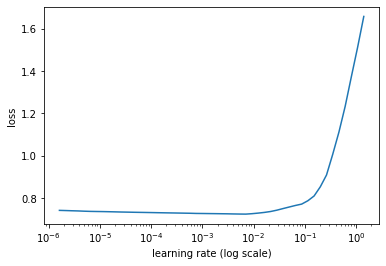

In [27]:
learner.lr_find(show_plot=True, max_epochs=1)

In [28]:
history = learner.fit_onecycle(2e-5, 20)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
67/67 [==============================] - 68s 801ms/step - loss: 0.6958 - accuracy: 0.5075 - val_loss: 0.6959 - val_accuracy: 0.4900
Epoch 2/20
67/67 [==============================] - 51s 755ms/step - loss: 0.6962 - accuracy: 0.4775 - val_loss: 0.6869 - val_accuracy: 0.5300
Epoch 3/20
67/67 [==============================] - 51s 755ms/step - loss: 0.6612 - accuracy: 0.6050 - val_loss: 0.6651 - val_accuracy: 0.6300
Epoch 4/20
67/67 [==============================] - 51s 757ms/step - loss: 0.5649 - accuracy: 0.7375 - val_loss: 0.6044 - val_accuracy: 0.6500
Epoch 5/20
67/67 [==============================] - 51s 756ms/step - loss: 0.3570 - accuracy: 0.9075 - val_loss: 0.5412 - val_accuracy: 0.7300
Epoch 6/20
67/67 [==============================] - 51s 755ms/step - loss: 0.1910 - accuracy: 0.9525 - val_loss: 0.6202 - val_accuracy: 0.7700
Epoch 7/20
67/67 [==============================] - 51s 756ms/step - loss: 0.08

In [36]:
class_names=["TRUE","FALSE"]

In [37]:
learner.validate(val_data=(val), class_names=class_names)

4/4 [==============================] - 5s 638ms/step
              precision    recall  f1-score   support

        TRUE       0.82      0.63      0.71        51
       FALSE       0.69      0.86      0.76        49

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.76      0.74      0.74       100



array([[32, 19],
       [ 7, 42]])

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 19s 274ms/step - loss: 0.0360 - accuracy: 0.9936


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


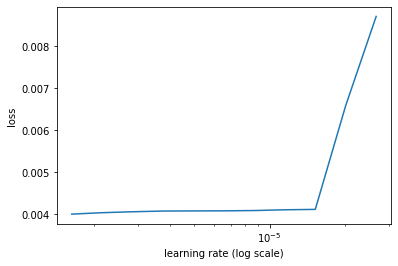

In [31]:
learner.lr_find(show_plot=True, max_epochs=1)

In [32]:
import matplotlib.pyplot as plt

In [33]:

def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

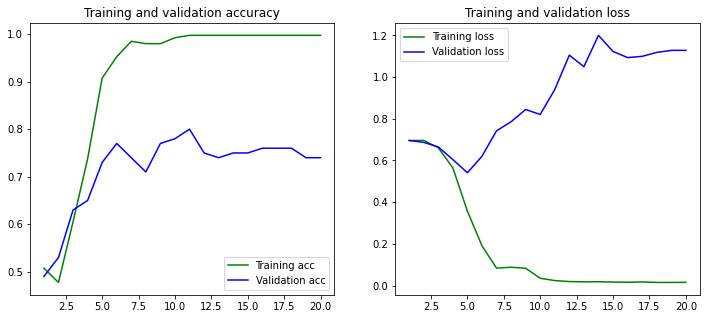

In [34]:
PlotGraph(history)

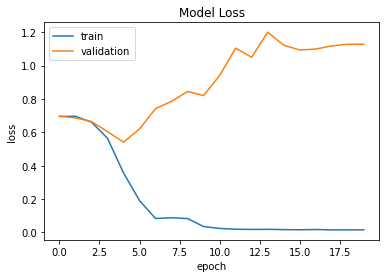

In [35]:
learner.plot('loss')